# MIdterm Exam

Friday, March 1, 2024

2 parts to the exam
1. Written portion
2. Programming portion

* Today: EDA
    * Example with Harry Potter Characters
* Friday: Finish EDA
* Monday: Class Project - Stock data
* Wednesday: Review
* Friday: Exam

# Exploratory Data Analysis
1. Obtain and Clean Data
2. Wrangle Data
3. Exploratory Data Analysis (EDA)
4. Model
5. Evaluate

With EDA, we look at:
* Statistics
* Graphing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Basic Statistics

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.value_counts()

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
3.07        1.00   Female  Yes     Sat   Dinner  1       1
22.23       5.00   Male    No      Sun   Dinner  2       1
20.69       2.45   Female  No      Sat   Dinner  4       1
            5.00   Male    No      Sun   Dinner  5       1
                                                        ..
15.53       3.00   Male    Yes     Sat   Dinner  2       1
15.69       1.50   Male    Yes     Sun   Dinner  2       1
            3.00   Male    Yes     Sat   Dinner  3       1
15.77       2.23   Female  No      Sat   Dinner  2       1
50.81       10.00  Male    Yes     Sat   Dinner  3       1
Name: count, Length: 243, dtype: int64

In [6]:
tips['sex'].value_counts()
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: xlabel='time', ylabel='count'>

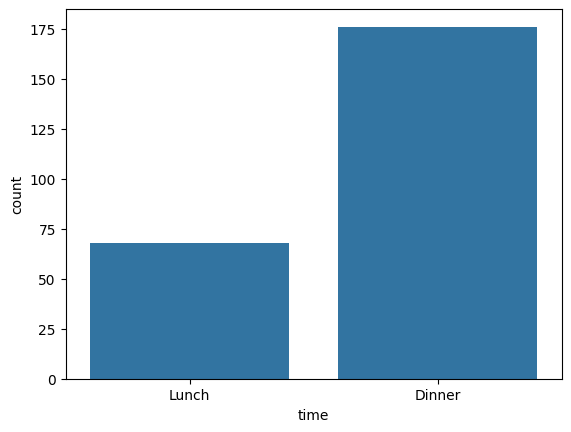

In [7]:
sns.countplot(data=tips, x='time')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

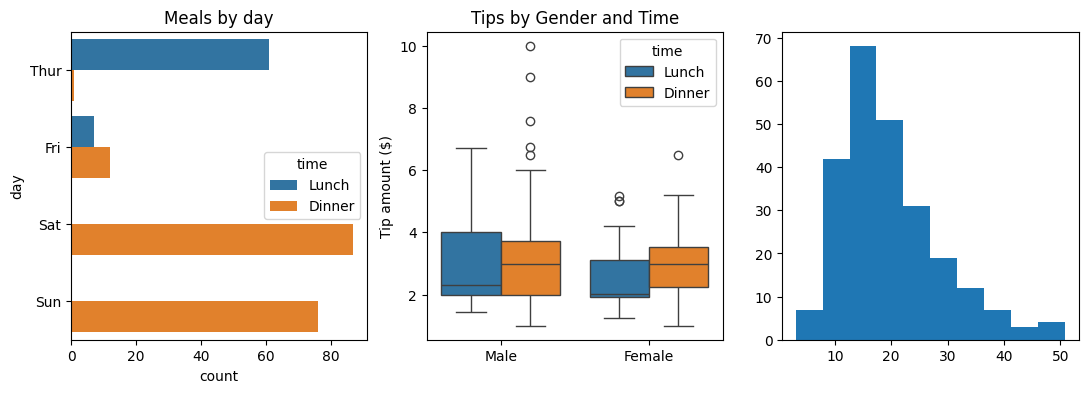

In [8]:
# ax is an array of axes : ax[0], ax[1], ax[2]

fig, ax = plt.subplots(1,3, figsize=(13,4))

sns.countplot(data=tips, y='day', hue='time', ax=ax[0])
ax[0].set_title('Meals by day')

sns.boxplot(data=tips, y='tip', x='sex', hue='time', ax=ax[1])
ax[1].set_title('Tips by Gender and Time')
ax[1].set_xlabel('')
ax[1].set_ylabel('Tip amount ($)')

ax[2].hist(tips['total_bill'])

<Axes: >

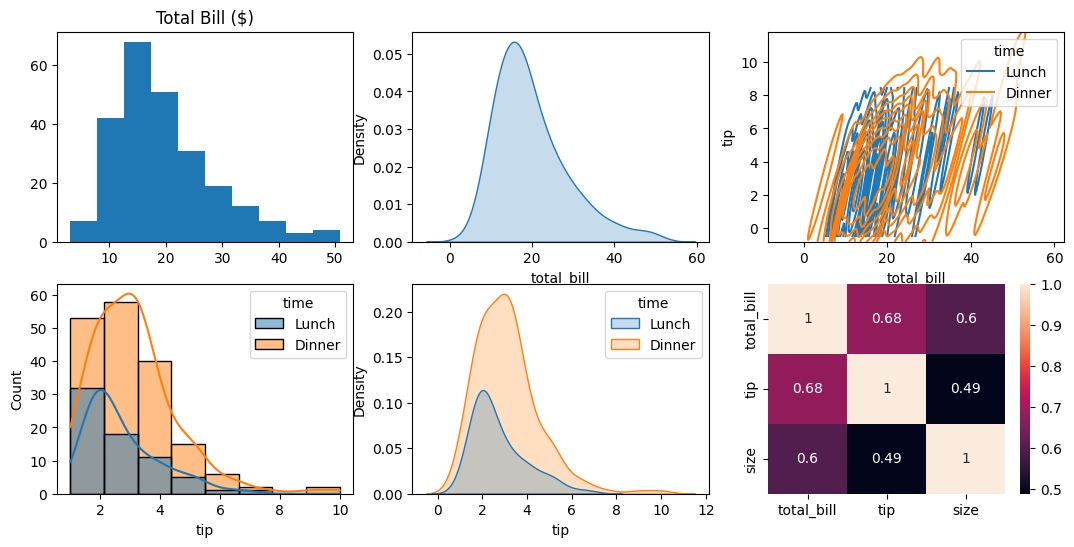

In [9]:
# ax is a matrix of axes : ax[row,col] where row = [0,1] and col = [0,1,2]
# for bins if n=244 take the closest 2^num that would be closes to the n value in this case it would be 2^8 or 2^7 since it is between them

fig, ax = plt.subplots(2,3, figsize=(13,6))

ax[0,0].hist(tips['total_bill'])
ax[0,0].set_title('Total Bill ($)')

sns.histplot(data=tips, x='tip', hue='time', bins=8, ax=ax[1,0], kde=True)

sns.kdeplot(data=tips, x='total_bill', fill=True, ax=ax[0,1])

sns.kdeplot(data=tips, x='tip', fill=True, hue='time', ax=ax[1,1])

sns.kdeplot(data=tips, x='total_bill', y='tip', fill=False, ax=ax[0,2], hue='time')

sns.heatmap(tips[['total_bill', 'tip', 'size']].corr(), annot=True, ax=ax[1,2])

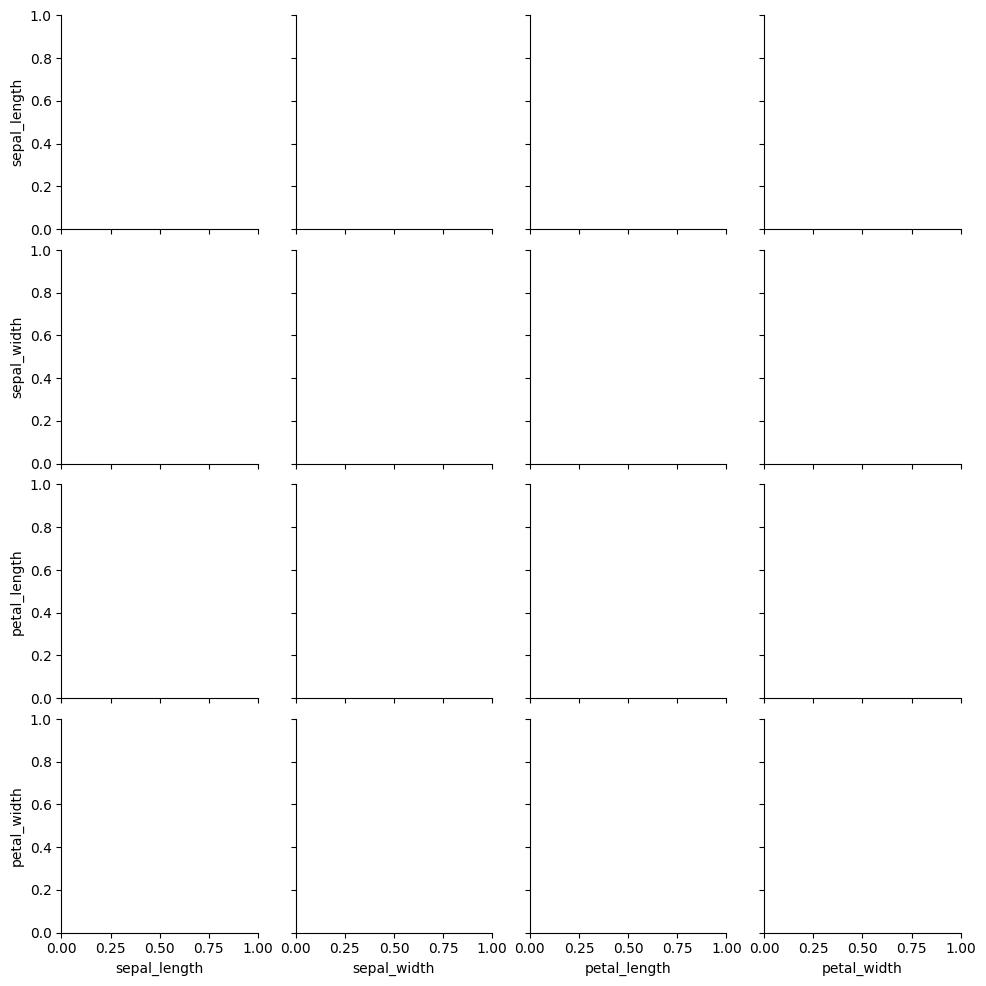

In [10]:
iris = sns.load_dataset('iris')

# Create a Grid of plots
sns.PairGrid(iris)

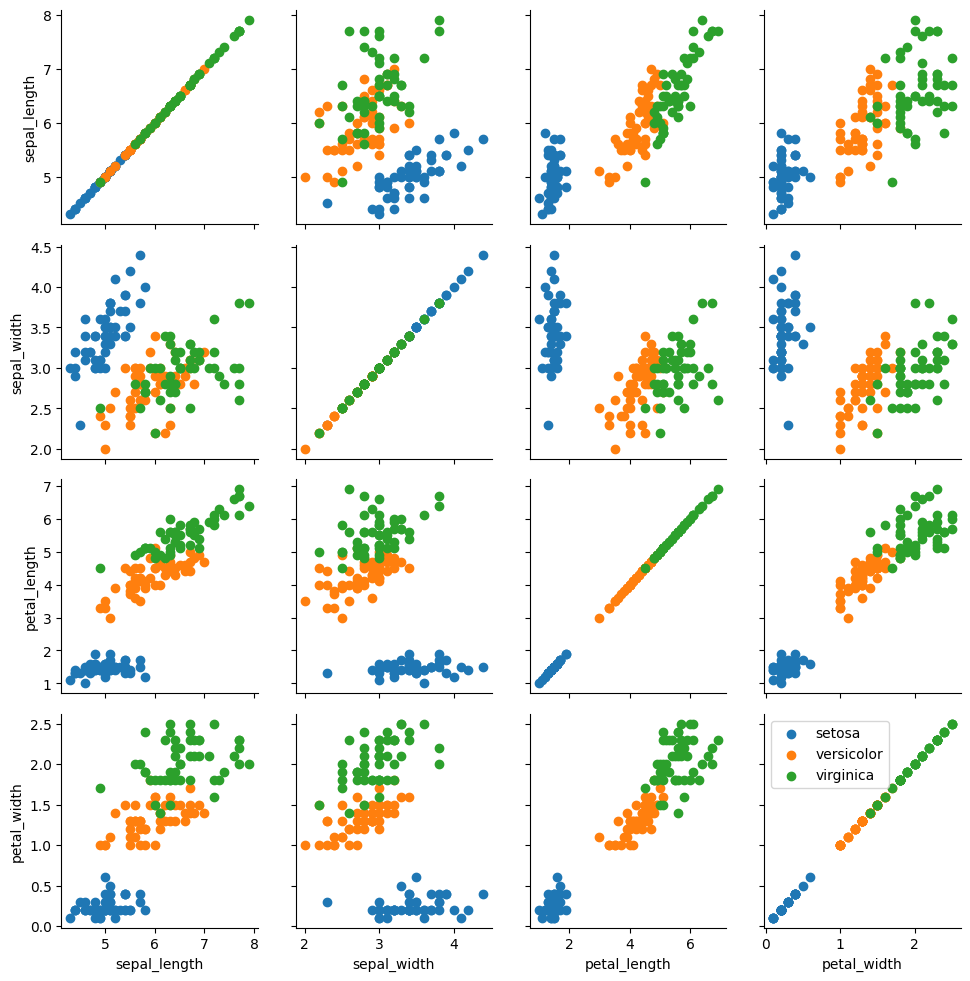

In [11]:
g = sns.PairGrid(iris, hue='species')

g.map(plt.scatter)
plt.legend()

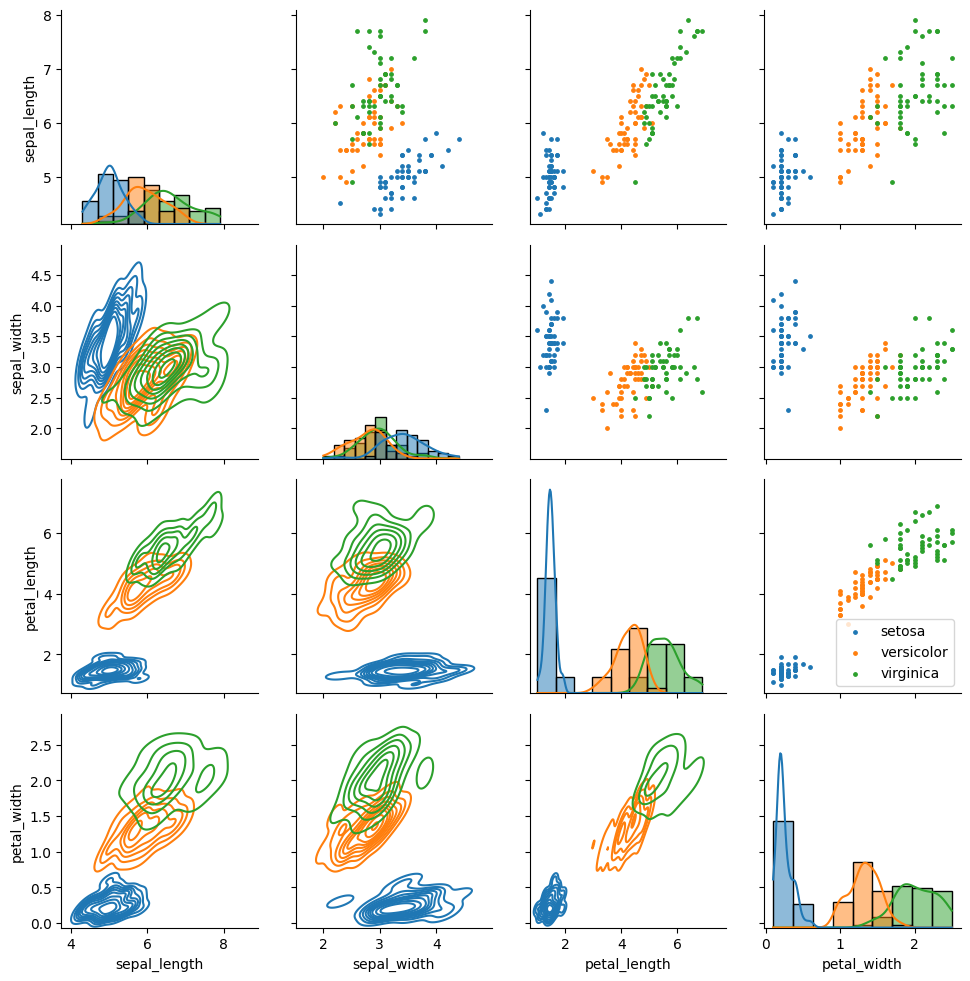

In [12]:
g = sns.PairGrid(iris, hue='species')

g.map_diag(sns.histplot, kde=True)
g.map_upper(plt.scatter, s=6)
g.map_lower(sns.kdeplot)
plt.legend()

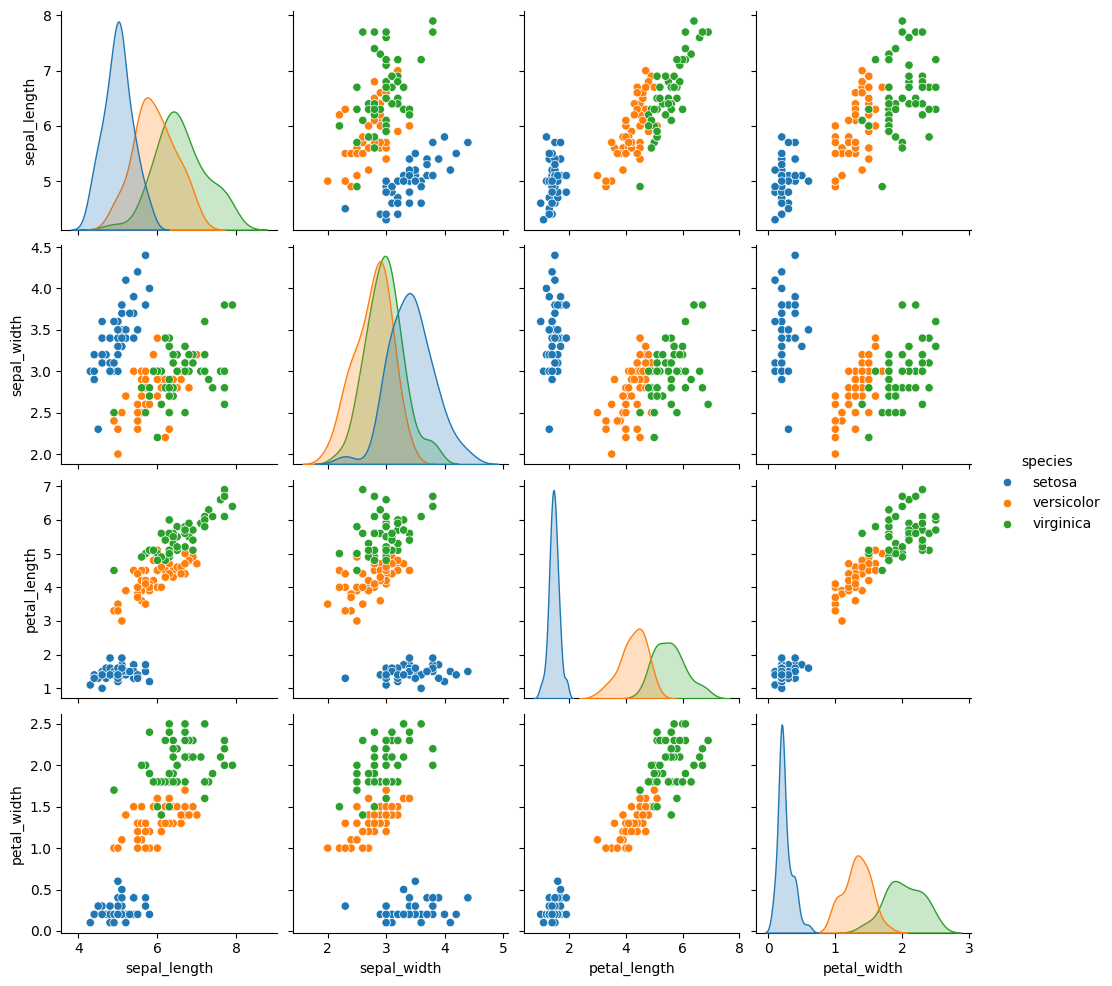

In [13]:
sns.pairplot(data=iris, hue='species')

# Interactive Graphs
- Bokeh
- Plotly
- Altair
- ...many others...

In [14]:
import plotly.express as px 
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [15]:
px.scatter(tips, x='total_bill', y='tip', color='smoker', size='size')